In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb # XGBoost stuff
import numpy as np
from sklearn.feature_selection import SelectFromModel

In [2]:
root = "../../../"

In [3]:
df = pd.read_csv(root + "datasets/binary/processed/CICDDoS_corr.csv", index_col=[0])

In [4]:
df[' Label'] = df[' Label'].apply(lambda x: 'ATTACK' if x != 'BENIGN' else 'BENIGN')

In [5]:
X = df.drop(columns=[' Label'])
y = df[' Label']

In [6]:
clf_xgb_gain = xgb.XGBClassifier(seed=42)
# clf_xgb.fit(X_train, 
#             y_train,
#             verbose=True,
#             ## the next three arguments set up early stopping.
#             early_stopping_rounds=5,
#             eval_metric='mlogloss',
#             eval_set=[(X_test, y_test)])
clf_xgb_gain.fit(X, y)

[23:29:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
C:\Users\pedro\miniconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [7]:
clf_xgb_gain.feature_importances_

array([3.7481918e-03, 2.4881154e-02, 5.8375364e-03, 4.6774140e-03,
       0.0000000e+00, 0.0000000e+00, 2.5933972e-04, 8.7068873e-03,
       2.0292187e-02, 2.2110716e-03, 4.6781646e-03, 5.3905044e-04,
       4.1608680e-03, 2.9757749e-03, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 2.1974423e-03,
       1.3415077e-03, 2.1024526e-03, 6.3143265e-03, 4.5291427e-01,
       8.6396222e-04, 4.8103384e-03, 0.0000000e+00, 2.3075277e-01,
       1.9458866e-02, 0.0000000e+00, 5.1474809e-03, 0.0000000e+00,
       0.0000000e+00, 1.8334222e-01, 3.5365946e-03, 4.2500687e-03,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
      dtype=float32)

Text(0, 0.5, 'Feature Importances (Gain)')

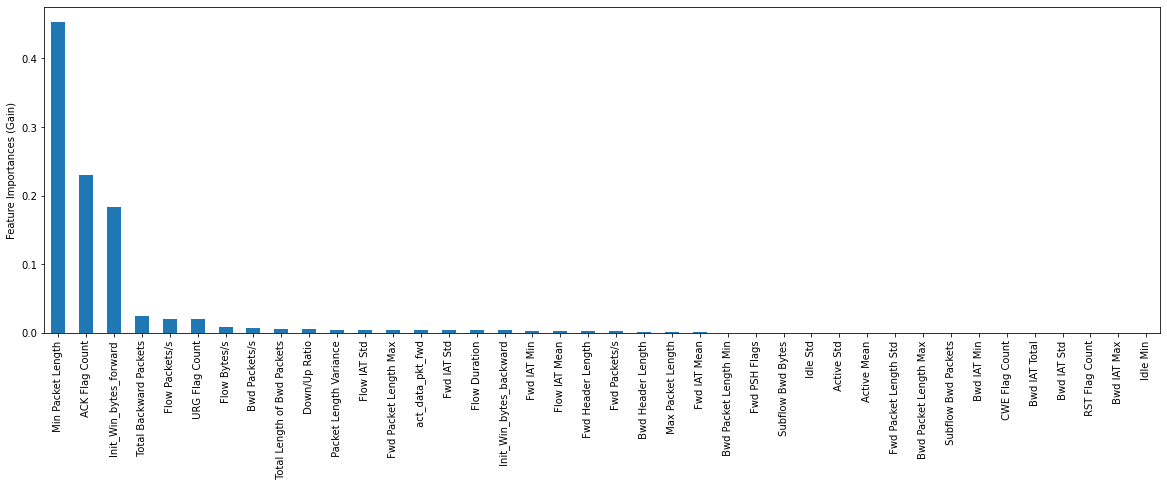

In [8]:
# 1) let's capture the above array in a pandas series
# 2) add the variable names in the index
# 3) sort the features based on their mutual information value
# 4) and make a bar plot

xgb_gain = pd.Series(clf_xgb_gain.feature_importances_)
xgb_gain.index = X.columns
xgb_gain.sort_values(ascending=False).plot.bar(figsize=(20, 6))
plt.ylabel('Feature Importances (Gain)')

In [9]:
selector = SelectFromModel(estimator=clf_xgb_gain,
                        prefit=True,
                        max_features = 20,
                        threshold=-np.inf)
                        #.fit(X_train, y_train)

X.columns[selector.get_support()]

Index([' Flow Duration', ' Total Backward Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       'Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std',
       ' Fwd IAT Std', ' Fwd IAT Min', ' Fwd Header Length', ' Bwd Packets/s',
       ' Min Packet Length', ' Packet Length Variance', ' ACK Flag Count',
       ' URG Flag Count', ' Down/Up Ratio', 'Init_Win_bytes_forward',
       ' Init_Win_bytes_backward', ' act_data_pkt_fwd'],
      dtype='object')

In [10]:
# to remove the rest of the features:

X = selector.transform(X)

In [11]:
X.shape

(5280, 20)